# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# import dependencies

import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from citipy import citipy
from config2 import weather_api_key
import pprint
from scipy.stats import linregress

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="

## Generate Cities List

In [3]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size =1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates


[(-57.34171968203118, -157.83516421207804),
 (46.85888458373367, -92.71476302275681),
 (21.873219214410554, 49.69120947419941),
 (-20.533262973399403, 71.48565359025389),
 (-31.965369661121827, 8.025322279017558),
 (4.86542886365595, -9.966372519296073),
 (6.531164043528435, -25.0504501844608),
 (-8.96152893688972, -125.77133342348439),
 (31.345531697792424, 126.89157265412638),
 (83.68399255154642, 121.10832755109527),
 (70.50338913516731, -3.0185420252649067),
 (36.63540270112202, 2.4587796405141944),
 (14.022736646804788, -50.57801938201061),
 (-73.0260345844986, -112.04593608553859),
 (21.384505344743758, -96.48881725006976),
 (-83.95282648305803, 110.83656952764261),
 (-45.0862111214849, -142.96791437405426),
 (0.5789608269835043, 9.048849645247827),
 (-38.775015456802805, 11.703718212031447),
 (82.14658925718967, 169.19882407651937),
 (-27.851137266193675, -83.95325489653499),
 (-25.430533232583755, 120.86876617539622),
 (-10.860668804181614, 33.34991980935854),
 (17.000308568803

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [5]:
#Verify if cities are present

cities

['mataura',
 'cloquet',
 'abu samrah',
 'grand river south east',
 'luderitz',
 'buchanan',
 'sao filipe',
 'atuona',
 'fukue',
 'saskylakh',
 'klaksvik',
 'medea',
 'iracoubo',
 'punta arenas',
 'tamiahua',
 'albany',
 'libreville',
 'cape town',
 'pevek',
 'coquimbo',
 'port hedland',
 'chama',
 'butaritari',
 'blagoveshchensk',
 'bluff',
 'catuday',
 'ostrovnoy',
 'barrow',
 'port alfred',
 'pascagoula',
 'ushuaia',
 'clyde river',
 'hermanus',
 'taolanaro',
 'palmer',
 'lagoa',
 'rikitea',
 'boa vista',
 'rungata',
 'tabiauea',
 'bethel',
 'bacolod',
 'bilibino',
 'ribeira grande',
 'yar-sale',
 'argayash',
 'busselton',
 'sola',
 'geraldton',
 'acanceh',
 'asfi',
 'kovur',
 'nikolskoye',
 'tuktoyaktuk',
 'maturin',
 'fayaoue',
 'cherskiy',
 'arraial do cabo',
 'upernavik',
 'alakurtti',
 'ust-kamchatsk',
 'lebu',
 'te anau',
 'iqaluit',
 'whitianga',
 'parit raja',
 'port-cartier',
 'itoman',
 'lubumbashi',
 'esperance',
 'srednekolymsk',
 'naze',
 'norman wells',
 'upington',
 't

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval")

print("-----------------------------")

#for loop that changes set number and cities

rec_number = 0

for i in cities:
    
    rec_number= rec_number + 1
    
    print(f"Processing Record {rec_number} of Set 1 | {i}")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | cloquet
Processing Record 3 of Set 1 | abu samrah
Processing Record 4 of Set 1 | grand river south east
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | buchanan
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | fukue
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | medea
Processing Record 13 of Set 1 | iracoubo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tamiahua
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | libreville
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | port hedland
Processing Record 22 of Set 1 | chama
Processing Record 23 of Set 1 | butarita

In [7]:
#Performing API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=Metric&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city ).json()
    pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 55},
 'cod': 200,
 'coord': {'lat': -46.1927, 'lon': 168.8643},
 'dt': 1636684044,
 'id': 6201424,
 'main': {'feels_like': 20.97,
          'grnd_level': 984,
          'humidity': 43,
          'pressure': 990,
          'sea_level': 990,
          'temp': 21.63,
          'temp_max': 21.63,
          'temp_min': 21.63},
 'name': 'Mataura',
 'sys': {'country': 'NZ', 'sunrise': 1636650361, 'sunset': 1636703484},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 308, 'gust': 12.79, 'speed': 4.91}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 46.7216, 'lon': -92.4594},
 'dt': 1636684045,
 'id': 5021632,
 'main': {'feels_like': -2.18,
          'humidity': 97,
          'pressure': 992,
          'temp': 1.49,
          'temp_max': 2.56,
          'temp_min': 0.74},
 'name': 'Cl

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -53.15, 'lon': -70.9167},
 'dt': 1636684054,
 'id': 3874787,
 'main': {'feels_like': 8.61,
          'humidity': 57,
          'pressure': 1015,
          'temp': 10.06,
          'temp_max': 10.06,
          'temp_min': 10.06},
 'name': 'Punta Arenas',
 'sys': {'country': 'CL',
         'id': 8487,
         'sunrise': 1636620099,
         'sunset': 1636676036,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 310, 'speed': 5.14}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 21.2667, 'lon': -97.45},
 'dt': 1636684054,
 'id': 3516376,
 'main': {'feels_like': 24.14,
          'grnd_level': 1016,
          'humidity': 77,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 23.7,
          'temp_max': 23.7

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 68.0531, 'lon': 39.5131},
 'dt': 1636684064,
 'id': 556268,
 'main': {'feels_like': -5.23,
          'grnd_level': 991,
          'humidity': 86,
          'pressure': 994,
          'sea_level': 994,
          'temp': 1.02,
          'temp_max': 1.02,
          'temp_min': 1.02},
 'name': 'Ostrovnoy',
 'rain': {'1h': 0.19},
 'sys': {'country': 'RU', 'sunrise': 1636698075, 'sunset': 1636717865},
 'timezone': 10800,
 'visibility': 6662,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 297, 'gust': 12.88, 'speed': 8.64}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 71.2906, 'lon': -156.7887},
 'dt': 1636684065,
 'id': 5880054,
 'main': {'feels_like': -14.99,
          'humidity': 73,
          'pressure': 1012,
          'temp': -7.99,
          'temp_max': -7.99,
          'temp_min': 

{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 10.6667, 'lon': 122.95},
 'dt': 1636684026,
 'id': 1729564,
 'main': {'feels_like': 35.63,
          'grnd_level': 1009,
          'humidity': 70,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 30.24,
          'temp_max': 30.24,
          'temp_min': 30.24},
 'name': 'Bacolod City',
 'rain': {'1h': 1.89},
 'sys': {'country': 'PH', 'sunrise': 1636666955, 'sunset': 1636708932},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 38, 'gust': 6.1, 'speed': 4.79}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 68.0546, 'lon': 166.4372},
 'dt': 1636684074,
 'id': 2126682,
 'main': {'feels_like': -10.96,
          'grnd_level': 976,
          'humidity': 77,
          'pressure': 1013,
          'sea_level': 1013,
         

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 69.4541, 'lon': -133.0374},
 'dt': 1636684082,
 'id': 6170031,
 'main': {'feels_like': -17,
          'humidity': 92,
          'pressure': 1010,
          'temp': -10,
          'temp_max': -10,
          'temp_min': -10},
 'name': 'Tuktoyaktuk',
 'sys': {'country': 'CA',
         'id': 942,
         'sunrise': 1636654169,
         'sunset': 1636671787,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 260, 'speed': 5.14}}
{'base': 'stations',
 'clouds': {'all': 58},
 'cod': 200,
 'coord': {'lat': 9.75, 'lon': -63.1767},
 'dt': 1636684083,
 'id': 3778045,
 'main': {'feels_like': 23.39,
          'grnd_level': 1005,
          'humidity': 93,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 22.64,
          'temp_max': 22.64,
   

{'base': 'stations',
 'clouds': {'all': 16},
 'cod': 200,
 'coord': {'lat': 50.0334, 'lon': -66.8654},
 'dt': 1636684028,
 'id': 6111696,
 'main': {'feels_like': -8.25,
          'grnd_level': 1028,
          'humidity': 43,
          'pressure': 1032,
          'sea_level': 1032,
          'temp': -4.88,
          'temp_max': -4.88,
          'temp_min': -6.94},
 'name': 'Port-Cartier',
 'sys': {'country': 'CA',
         'id': 1013,
         'sunrise': 1636630458,
         'sunset': 1636663733,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 347, 'gust': 2.51, 'speed': 2.08}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.1247, 'lon': 127.6694},
 'dt': 1636684092,
 'id': 1861280,
 'main': {'feels_like': 21.47,
          'humidity': 46,
          'pressure': 1021,
          'temp': 22.01,
     

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.4111, 'lon': 80.2275},
 'dt': 1636684101,
 'id': 1519422,
 'main': {'feels_like': -8.16,
          'humidity': 80,
          'pressure': 1022,
          'temp': -3.88,
          'temp_max': -3.88,
          'temp_min': -3.88},
 'name': 'Semey',
 'sys': {'country': 'KZ',
         'id': 8833,
         'sunrise': 1636681687,
         'sunset': 1636714708,
         'type': 1},
 'timezone': 21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 3}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.1502, 'lon': -123.2078},
 'dt': 1636683803,
 'id': 5404476,
 'main': {'feels_like': 15.22,
          'humidity': 88,
          'pressure': 1023,
          'temp': 15.33,
          'temp_max': 17.54,
          'temp_min': 12.77},
 'name': 'Ukiah',
 'sys': {'count

{'base': 'stations',
 'clouds': {'all': 77},
 'cod': 200,
 'coord': {'lat': 62.8833, 'lon': 152.4333},
 'dt': 1636684110,
 'id': 2121373,
 'main': {'feels_like': -7.85,
          'grnd_level': 981,
          'humidity': 98,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': -7.85,
          'temp_max': -7.85,
          'temp_min': -7.85},
 'name': 'Seymchan',
 'sys': {'country': 'RU', 'sunrise': 1636667898, 'sunset': 1636693836},
 'timezone': 39600,
 'visibility': 8283,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 171, 'gust': 0.51, 'speed': 0.19}}
{'base': 'stations',
 'clouds': {'all': 39},
 'cod': 200,
 'coord': {'lat': -14.2667, 'lon': 50.1667},
 'dt': 1636684111,
 'id': 1056899,
 'main': {'feels_like': 23.49,
          'grnd_level': 1012,
          'humidity': 90,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 22.8,
         

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -41.1456, 'lon': -71.3082},
 'dt': 1636684119,
 'id': 7647007,
 'main': {'feels_like': 12.71,
          'humidity': 54,
          'pressure': 1016,
          'temp': 13.86,
          'temp_max': 13.86,
          'temp_min': 13.86},
 'name': 'Bariloche',
 'rain': {'1h': 0.21},
 'sys': {'country': 'AR',
         'id': 8315,
         'sunrise': 1636622427,
         'sunset': 1636673896,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 290, 'speed': 5.14}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.7502, 'lon': -77.6328},
 'dt': 1636684120,
 'id': 6067747,
 'main': {'feels_like': -3.38,
          'humidity': 64,
          'pressure': 1017,
          'temp': 1.06,
          'temp_max': 1.06,
          'temp_min': 1.06},
 '

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.0217, 'lon': 22.401},
 'dt': 1636684132,
 'id': 932987,
 'main': {'feels_like': 21.42,
          'grnd_level': 904,
          'humidity': 14,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 22.73,
          'temp_max': 22.73,
          'temp_min': 22.73},
 'name': 'Tsabong',
 'sys': {'country': 'BW', 'sunrise': 1636688086, 'sunset': 1636736068},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 128, 'gust': 7.3, 'speed': 4.92}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -23.7, 'lon': 133.8833},
 'dt': 1636684005,
 'id': 2077895,
 'main': {'feels_like': 15.81,
          'humidity': 51,
          'pressure': 1017,
          'temp': 16.75,
          'temp_max': 16.75,
          'temp_min': 16.75},
 'name': 'Alice Spri

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.3191, 'lon': -8.8033},
 'dt': 1636684142,
 'id': 2271968,
 'main': {'feels_like': 12.78,
          'grnd_level': 1015,
          'humidity': 84,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 13.21,
          'temp_max': 13.21,
          'temp_min': 13.21},
 'name': 'Aljezur',
 'sys': {'country': 'PT', 'sunrise': 1636701087, 'sunset': 1636738048},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 28, 'gust': 2.31, 'speed': 2.13}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 7.1344, 'lon': -3.2047},
 'dt': 1636684143,
 'id': 2293260,
 'main': {'feels_like': 22.9,
          'grnd_level': 982,
          'humidity': 97,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 22.1,
          'temp_max': 2

{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': 45.7625, 'lon': 106.2708},
 'dt': 1636684151,
 'id': 2030065,
 'main': {'feels_like': -6.04,
          'grnd_level': 856,
          'humidity': 39,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': -1.41,
          'temp_max': -1.41,
          'temp_min': -1.41},
 'name': 'Mandalgovi',
 'sys': {'country': 'MN', 'sunrise': 1636674613, 'sunset': 1636709281},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 276, 'gust': 9.13, 'speed': 4.03}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 49.9811, 'lon': 92.0667},
 'dt': 1636684152,
 'id': 1515029,
 'main': {'feels_like': -8.03,
          'grnd_level': 917,
          'humidity': 78,
          'pressure': 1032,
          'sea_level': 1032,
          'temp': -8.03,
         

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 62.456, 'lon': -114.3525},
 'dt': 1636683993,
 'id': 6185377,
 'main': {'feels_like': -5.99,
          'humidity': 89,
          'pressure': 1023,
          'temp': -0.36,
          'temp_max': 0.23,
          'temp_min': -1.51},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 2041581,
         'sunrise': 1636645299,
         'sunset': 1636671688,
         'type': 2},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'gust': 9.77, 'speed': 6.17}}
{'base': 'stations',
 'clouds': {'all': 13},
 'cod': 200,
 'coord': {'lat': 51.226, 'lon': -58.6502},
 'dt': 1636684161,
 'id': 6137462,
 'main': {'feels_like': -7.45,
          'grnd_level': 1024,
          'humidity': 75,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': -1.67,

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 20.785, 'lon': -156.4656},
 'dt': 1636684170,
 'id': 5849297,
 'main': {'feels_like': 28.03,
          'humidity': 64,
          'pressure': 1014,
          'temp': 26.75,
          'temp_max': 29.01,
          'temp_min': 24.27},
 'name': 'Kīhei',
 'sys': {'country': 'US',
         'id': 7879,
         'sunrise': 1636648435,
         'sunset': 1636688767,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'gust': 10.8, 'speed': 7.72}}
{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': 69.2167, 'lon': -51.1},
 'dt': 1636684171,
 'id': 3423146,
 'main': {'feels_like': -18.99,
          'humidity': 67,
          'pressure': 1021,
          'temp': -11.99,
          'temp_max': -11.99,
          'temp_min': -11.99},
 'nam

{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 50.3643, 'lon': 108.7512},
 'dt': 1636684179,
 'id': 2012349,
 'main': {'feels_like': -2.45,
          'grnd_level': 926,
          'humidity': 54,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': -2.45,
          'temp_max': -2.45,
          'temp_min': -2.45},
 'name': 'Krasnyy Chikoy',
 'sys': {'country': 'RU', 'sunrise': 1636674824, 'sunset': 1636707878},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 213, 'gust': 1.21, 'speed': 0.75}}
{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': 64.1835, 'lon': -51.7216},
 'dt': 1636684180,
 'id': 3421319,
 'main': {'feels_like': -14.66,
          'humidity': 73,
          'pressure': 1016,
          'temp': -7.66,
          'temp_max': -7.66,
          'temp_min': -7.66}

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -0.9516, 'lon': 122.7875},
 'dt': 1636684189,
 'id': 1637001,
 'main': {'feels_like': 35.38,
          'grnd_level': 1008,
          'humidity': 66,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 30.56,
          'temp_max': 30.56,
          'temp_min': 30.56},
 'name': 'Luwuk',
 'rain': {'1h': 0.12},
 'sys': {'country': 'ID', 'sunrise': 1636666101, 'sunset': 1636709864},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 117, 'gust': 1.71, 'speed': 1.43}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -9.1667, 'lon': -60.6333},
 'dt': 1636684190,
 'id': 3665202,
 'main': {'feels_like': 22.79,
          'grnd_level': 994,
          'humidity': 98,
          'pressure': 1012,
          'sea_level': 1012,
          'temp'

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 53.0194, 'lon': 39.1664},
 'dt': 1636684199,
 'id': 536518,
 'main': {'feels_like': -5.11,
          'grnd_level': 1001,
          'humidity': 68,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': -0.36,
          'temp_max': -0.36,
          'temp_min': -0.36},
 'name': "Lebedyan'",
 'sys': {'country': 'RU', 'sunrise': 1636692096, 'sunset': 1636724011},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 217, 'gust': 10.31, 'speed': 4.57}}
{'base': 'stations',
 'clouds': {'all': 77},
 'cod': 200,
 'coord': {'lat': 37.7167, 'lon': -25.4333},
 'dt': 1636684200,
 'id': 3372472,
 'main': {'feels_like': 21.59,
          'grnd_level': 1019,
          'humidity': 84,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 21.22,
   

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 49.7834, 'lon': -74.8492},
 'dt': 1636684209,
 'id': 5919850,
 'main': {'feels_like': -5.26,
          'grnd_level': 974,
          'humidity': 72,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': -0.12,
          'temp_max': -0.12,
          'temp_min': -0.12},
 'name': 'Chapais',
 'sys': {'country': 'CA',
         'id': 859,
         'sunrise': 1636632329,
         'sunset': 1636665694,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 127, 'gust': 14.07, 'speed': 5.35}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -17.8786, 'lon': 36.8883},
 'dt': 1636684210,
 'id': 1028434,
 'main': {'feels_like': 25.82,
          'humidity': 88,
          'pressure': 1012,
          'temp': 24.97,
    

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -13.2, 'lon': 49.05},
 'dt': 1636684219,
 'id': 1082243,
 'main': {'feels_like': 24.68,
          'grnd_level': 1009,
          'humidity': 84,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 24.03,
          'temp_max': 24.03,
          'temp_min': 24.03},
 'name': 'Ambilobe',
 'sys': {'country': 'MG', 'sunrise': 1636682835, 'sunset': 1636728527},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 66, 'gust': 4.59, 'speed': 1.87}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.2867, 'lon': 51.5333},
 'dt': 1636683980,
 'id': 290030,
 'main': {'feels_like': 24.75,
          'humidity': 55,
          'pressure': 1014,
          'temp': 24.78,
          'temp_max': 25.94,
          'temp_min': 20.17},
 'name': 'Doh

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -31.6333, 'lon': -60.7},
 'dt': 1636684229,
 'id': 3836277,
 'main': {'feels_like': 21.96,
          'humidity': 48,
          'pressure': 1014,
          'temp': 22.41,
          'temp_max': 22.79,
          'temp_min': 21.53},
 'name': 'Santa Fe',
 'sys': {'country': 'AR',
         'id': 2008823,
         'sunrise': 1636621074,
         'sunset': 1636670157,
         'type': 2},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 78, 'gust': 2.68, 'speed': 0.89}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': -1.5746, 'lon': 9.2618},
 'dt': 1636684230,
 'id': 2396853,
 'main': {'feels_like': 24.78,
          'grnd_level': 1008,
          'humidity': 95,
          'pressure': 1009,
          'sea_level': 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 50.2334, 'lon': -63.5986},
 'dt': 1636684238,
 'id': 5972291,
 'main': {'feels_like': -7.12,
          'humidity': 59,
          'pressure': 1029,
          'temp': -2.57,
          'temp_max': -1,
          'temp_min': -2.8},
 'name': 'Havre-St-Pierre',
 'sys': {'country': 'CA',
         'id': 812,
         'sunrise': 1636629711,
         'sunset': 1636662912,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 340, 'speed': 3.6}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.8161, 'lon': 109.9776},
 'dt': 1636684239,
 'id': 1812256,
 'main': {'feels_like': -4.01,
          'grnd_level': 861,
          'humidity': 29,
          'pressure': 1027,
          'sea_level': 1027,
          'temp': 0.92,
          'temp_max': 0.

{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': -19.55, 'lon': 169.2667},
 'dt': 1636684248,
 'id': 2136825,
 'main': {'feels_like': 29.73,
          'grnd_level': 1011,
          'humidity': 74,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 27.28,
          'temp_max': 27.28,
          'temp_min': 27.28},
 'name': 'Isangel',
 'sys': {'country': 'VU', 'sunrise': 1636653449, 'sunset': 1636700204},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 128, 'gust': 1.89, 'speed': 1.19}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.0449, 'lon': -17.3389},
 'dt': 1636684249,
 'id': 2629833,
 'main': {'feels_like': -17.05,
          'grnd_level': 1014,
          'humidity': 78,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': -10.05,
     

{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 65.7, 'lon': 82.4667},
 'dt': 1636684258,
 'id': 1502073,
 'main': {'feels_like': -25.81,
          'grnd_level': 1013,
          'humidity': 97,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': -18.81,
          'temp_max': -18.81,
          'temp_min': -18.81},
 'name': "Krasnosel'kup",
 'sys': {'country': 'RU', 'sunrise': 1636686141, 'sunset': 1636709180},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 182, 'gust': 9.79, 'speed': 5.09}}
{'base': 'stations',
 'clouds': {'all': 58},
 'cod': 200,
 'coord': {'lat': 15.85, 'lon': -97.0667},
 'dt': 1636684258,
 'id': 3520994,
 'main': {'feels_like': 25.6,
          'grnd_level': 1014,
          'humidity': 79,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 24.98,
  

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.0393, 'lon': -71.6273},
 'dt': 1636684267,
 'id': 3868626,
 'main': {'feels_like': 11.46,
          'humidity': 93,
          'pressure': 1019,
          'temp': 11.8,
          'temp_max': 12.51,
          'temp_min': 11.8},
 'name': 'Valparaíso',
 'sys': {'country': 'CL',
         'id': 8520,
         'sunrise': 1636623538,
         'sunset': 1636672938,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0, 'speed': 1.03}}
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': -10.7073, 'lon': 22.2247},
 'dt': 1636684268,
 'id': 876177,
 'main': {'feels_like': 19.33,
          'grnd_level': 890,
          'humidity': 94,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 18.93,
          'temp_max': 18.93,

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 27},
 'cod': 200,
 'coord': {'lat': 26.7667, 'lon': 92.1333},
 'dt': 1636684277,
 'id': 1253977,
 'main': {'feels_like': 20.58,
          'grnd_level': 1003,
          'humidity': 54,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 21.01,
          'temp_max': 21.01,
          'temp_min': 21.01},
 'name': 'Udalguri',
 'sys': {'country': 'IN', 'sunrise': 1636675723, 'sunset': 1636714957},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 102, 'gust': 3.85, 'speed': 2.88}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 63.05, 'lon': 179.3167},
 'dt': 1636684278,
 'id': 2126710,
 'main': {'feels_like': -8.75,
          'grnd_level': 1017,
          'humidity': 90,
          'pressure': 1020,
          'sea_

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -31.95, 'lon': 141.4333},
 'dt': 1636684286,
 'id': 2173911,
 'main': {'feels_like': 14.13,
          'humidity': 67,
          'pressure': 1004,
          'temp': 14.84,
          'temp_max': 14.84,
          'temp_min': 14.84},
 'name': 'Broken Hill',
 'sys': {'country': 'AU',
         'id': 9491,
         'sunrise': 1636658910,
         'sunset': 1636708104,
         'type': 1},
 'timezone': 37800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 11.32}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 60.3964, 'lon': -1.353},
 'dt': 1636684287,
 'id': 2654970,
 'main': {'feels_like': 4.45,
          'grnd_level': 1007,
          'humidity': 84,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 8.95,
          'temp_max'

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 3.8653, 'lon': -67.9239},
 'dt': 1636684295,
 'id': 3671450,
 'main': {'feels_like': 24.85,
          'grnd_level': 999,
          'humidity': 85,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 24.16,
          'temp_max': 24.16,
          'temp_min': 24.16},
 'name': 'Inírida',
 'sys': {'country': 'CO', 'sunrise': 1636625833, 'sunset': 1636668865},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 139, 'gust': 0.42, 'speed': 0.34}}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 9.9287, 'lon': -69.6201},
 'dt': 1636684296,
 'id': 3629419,
 'main': {'feels_like': 21.53,
          'grnd_level': 936,
          'humidity': 78,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 21.31,
       

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -18.5067, 'lon': -54.76},
 'dt': 1636684304,
 'id': 3465228,
 'main': {'feels_like': 24.95,
          'grnd_level': 988,
          'humidity': 90,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 24.13,
          'temp_max': 24.13,
          'temp_min': 24.13},
 'name': 'Coxim',
 'rain': {'1h': 3.16},
 'sys': {'country': 'BR', 'sunrise': 1636620913, 'sunset': 1636667467},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 115, 'gust': 8.29, 'speed': 2.58}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.1, 'lon': -91.0167},
 'dt': 1636684128,
 'id': 3520406,
 'main': {'feels_like': 22.54,
          'grnd_level': 1008,
          'humidity': 83,
          'pressure': 1014,
          'sea_level': 1014,
          'temp':

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -38.0023, 'lon': -57.5575},
 'dt': 1636684243,
 'id': 3430863,
 'main': {'feels_like': 16.95,
          'humidity': 80,
          'pressure': 1025,
          'temp': 17.1,
          'temp_max': 17.27,
          'temp_min': 16.01},
 'name': 'Mar del Plata',
 'sys': {'country': 'AR',
         'id': 268283,
         'sunrise': 1636619560,
         'sunset': 1636670162,
         'type': 2},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'gust': 8.05, 'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -30.1811, 'lon': -50.2056},
 'dt': 1636684315,
 'id': 3466165,
 'main': {'feels_like': 17.58,
          'grnd_level': 1022,
          'humidity': 62,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 18.1

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -7.0561, 'lon': -76.5911},
 'dt': 1636684323,
 'id': 3699364,
 'main': {'feels_like': 25.7,
          'grnd_level': 976,
          'humidity': 99,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 24.6,
          'temp_max': 24.6,
          'temp_min': 24.6},
 'name': 'Bellavista',
 'sys': {'country': 'PE',
         'id': 8692,
         'sunrise': 1636627081,
         'sunset': 1636671778,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 345, 'gust': 0.44, 'speed': 0.36}}
{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': -16.5167, 'lon': -151.75},
 'dt': 1636684324,
 'id': 4033077,
 'main': {'feels_like': 26.32,
          'grnd_level': 1011,
          'humidity': 72,
          'pressure': 1011,


{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 68.2191, 'lon': -135.0107},
 'dt': 1636684333,
 'id': 5882953,
 'main': {'feels_like': -20.03,
          'grnd_level': 1010,
          'humidity': 99,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': -15.54,
          'temp_max': -15.54,
          'temp_min': -17.6},
 'name': 'Aklavik',
 'sys': {'country': 'CA',
         'id': 1029,
         'sunrise': 1636653550,
         'sunset': 1636673353,
         'type': 1},
 'timezone': -25200,
 'visibility': 8164,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 168, 'gust': 1.68, 'speed': 1.74}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -2.6741, 'lon': 141.3028},
 'dt': 1636684334,
 'id': 2084442,
 'main': {'feels_like': 35.04,
          'grnd_level': 1005,
        

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.0025, 'lon': 132.4325},
 'dt': 1636684342,
 'id': 2025241,
 'main': {'feels_like': -18.04,
          'grnd_level': 979,
          'humidity': 88,
          'pressure': 1002,
          'sea_level': 1002,
          'temp': -13.15,
          'temp_max': -13.15,
          'temp_min': -13.15},
 'name': 'Churapcha',
 'sys': {'country': 'RU', 'sunrise': 1636672339, 'sunset': 1636698995},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 311, 'gust': 2.91, 'speed': 2.15}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 54.7183, 'lon': 135.315},
 'dt': 1636684343,
 'id': 2025256,
 'main': {'feels_like': -10.07,
          'grnd_level': 994,
          'humidity': 86,
          'pressure': 995,
          'sea_level': 995,
          'temp': -3.13,
 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 58.3019, 'lon': -134.4197},
 'dt': 1636684351,
 'id': 5554072,
 'main': {'feels_like': -0.92,
          'humidity': 92,
          'pressure': 995,
          'temp': 1.83,
          'temp_max': 3.25,
          'temp_min': 0.61},
 'name': 'Juneau',
 'snow': {'1h': 0.25},
 'sys': {'country': 'US',
         'id': 2012911,
         'sunrise': 1636648657,
         'sunset': 1636677963,
         'type': 2},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 290, 'speed': 2.57}}
{'base': 'stations',
 'clouds': {'all': 23},
 'cod': 200,
 'coord': {'lat': -27.7951, 'lon': -64.2615},
 'dt': 1636684259,
 'id': 3835869,
 'main': {'feels_like': 22.36,
          'grnd_level': 993,
          'humidity': 46,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 22.82,
   

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -3.6667, 'lon': 152.4333},
 'dt': 1636684360,
 'id': 2090021,
 'main': {'feels_like': 32.57,
          'grnd_level': 1003,
          'humidity': 74,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 28.61,
          'temp_max': 28.61,
          'temp_min': 28.61},
 'name': 'Namatanai',
 'rain': {'1h': 0.38},
 'sys': {'country': 'PG', 'sunrise': 1636658777, 'sunset': 1636702956},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 53, 'gust': 2.29, 'speed': 2.09}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 4.7413, 'lon': 22.8184},
 'dt': 1636684361,
 'id': 240498,
 'main': {'feels_like': 21.24,
          'grnd_level': 952,
          'humidity': 96,
          'pressure': 1009,
          'sea_level': 1009,
          'temp'

{'base': 'stations',
 'clouds': {'all': 58},
 'cod': 200,
 'coord': {'lat': -46.1333, 'lon': 167.6833},
 'dt': 1636684370,
 'id': 2180815,
 'main': {'feels_like': 17.87,
          'grnd_level': 988,
          'humidity': 51,
          'pressure': 990,
          'sea_level': 990,
          'temp': 18.62,
          'temp_max': 18.62,
          'temp_min': 18.62},
 'name': 'Tuatapere',
 'sys': {'country': 'NZ', 'sunrise': 1636650655, 'sunset': 1636703758},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 287, 'gust': 8.02, 'speed': 3.13}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 38.0507, 'lon': 58.2056},
 'dt': 1636684370,
 'id': 162099,
 'main': {'feels_like': 4.3,
          'humidity': 70,
          'pressure': 1030,
          'temp': 5.85,
          'temp_max': 5.85,
          'temp_min': 5.85},
 'name': 'Abad

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 51.0933, 'lon': 128.3786},
 'dt': 1636684378,
 'id': 2016942,
 'main': {'feels_like': -6.4,
          'grnd_level': 979,
          'humidity': 60,
          'pressure': 1000,
          'sea_level': 1000,
          'temp': -2.4,
          'temp_max': -2.4,
          'temp_min': -2.4},
 'name': 'Seryshevo',
 'sys': {'country': 'RU', 'sunrise': 1636670252, 'sunset': 1636703029},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'gust': 5.1, 'speed': 3.02}}
{'base': 'stations',
 'clouds': {'all': 10},
 'cod': 200,
 'coord': {'lat': 13.8072, 'lon': 8.9881},
 'dt': 1636684379,
 'id': 2437798,
 'main': {'feels_like': 24.69,
          'grnd_level': 958,
          'humidity': 14,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 25.7,
          'te

{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': -19.9, 'lon': 48.8},
 'dt': 1636684387,
 'id': 1062553,
 'main': {'feels_like': 24.25,
          'grnd_level': 1014,
          'humidity': 85,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 23.61,
          'temp_max': 23.61,
          'temp_min': 23.61},
 'name': 'Mahanoro',
 'sys': {'country': 'MG', 'sunrise': 1636682324, 'sunset': 1636729158},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 324, 'gust': 2.16, 'speed': 1.36}}
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -23.65, 'lon': -70.4},
 'dt': 1636684096,
 'id': 3899539,
 'main': {'feels_like': 16.35,
          'grnd_level': 1014,
          'humidity': 78,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 16.6,
          'temp_m

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 64.8569, 'lon': -147.8028},
 'dt': 1636684320,
 'id': 5859699,
 'main': {'feels_like': -18.12,
          'humidity': 72,
          'pressure': 1007,
          'temp': -18.12,
          'temp_max': -13.22,
          'temp_min': -21.01},
 'name': 'College',
 'snow': {'1h': 0.12},
 'sys': {'country': 'US',
         'id': 7683,
         'sunrise': 1636654463,
         'sunset': 1636678581,
         'type': 1},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 0, 'speed': 0}}
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 55.6848, 'lon': 76.7471},
 'dt': 1636684398,
 'id': 1487615,
 'main': {'feels_like': -8.52,
          'grnd_level': 1005,
          'humidity': 95,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': -4.61,
   

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 52.2667, 'lon': 79.1667},
 'dt': 1636684407,
 'id': 1503153,
 'main': {'feels_like': -2.97,
          'grnd_level': 1002,
          'humidity': 49,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 1.47,
          'temp_max': 1.47,
          'temp_min': 1.47},
 'name': 'Klyuchi',
 'sys': {'country': 'RU', 'sunrise': 1636682320, 'sunset': 1636714585},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 172, 'gust': 10.82, 'speed': 4.8}}
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 61.9875, 'lon': 5.1352},
 'dt': 1636684408,
 'id': 3146487,
 'main': {'feels_like': 1.42,
          'humidity': 92,
          'pressure': 1016,
          'temp': 3.82,
          'temp_max': 4.55,
          'temp_min': 3.31},
 'name': 'Raud

{'base': 'stations',
 'clouds': {'all': 14},
 'cod': 200,
 'coord': {'lat': -20.7333, 'lon': 139.5},
 'dt': 1636684417,
 'id': 2065594,
 'main': {'feels_like': 21.08,
          'humidity': 37,
          'pressure': 1013,
          'temp': 21.87,
          'temp_max': 21.87,
          'temp_min': 21.87},
 'name': 'Mount Isa',
 'sys': {'country': 'AU',
         'id': 9495,
         'sunrise': 1636660486,
         'sunset': 1636707456,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 2.57}}
{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 30.3072, 'lon': 112.2447},
 'dt': 1636684418,
 'id': 1795816,
 'main': {'feels_like': 14.69,
          'grnd_level': 1022,
          'humidity': 48,
          'pressure': 1027,
          'sea_level': 1027,
          'temp': 15.8,
          'temp_max': 15.

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 55.2834, 'lon': -114.769},
 'dt': 1636684426,
 'id': 6149374,
 'main': {'feels_like': -10.02,
          'humidity': 100,
          'pressure': 1023,
          'temp': -4.01,
          'temp_max': -4.01,
          'temp_min': -4.01},
 'name': 'Slave Lake',
 'sys': {'country': 'CA',
         'id': 1008,
         'sunrise': 1636643106,
         'sunset': 1636674080,
         'type': 1},
 'timezone': -25200,
 'visibility': 9656,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 90, 'gust': 7.72, 'speed': 5.14}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 54.0167, 'lon': 23.9667},
 'dt': 1636684427,
 'id': 599757,
 'main': {'feels_like': 5.13,
          'grnd_level': 1006,
          'humidity': 81,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 8.2,
          'temp_max': 8.2,
          'temp_min': 8.2},
 'nam

{'base': 'stations',
 'clouds': {'all': 31},
 'cod': 200,
 'coord': {'lat': 50.6789, 'lon': 156.125},
 'dt': 1636684435,
 'id': 2121385,
 'main': {'feels_like': 3.56,
          'grnd_level': 1011,
          'humidity': 91,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 6.88,
          'temp_max': 6.88,
          'temp_min': 6.88},
 'name': "Severo-Kuril'sk",
 'sys': {'country': 'RU', 'sunrise': 1636663503, 'sunset': 1636696458},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 144, 'gust': 6.68, 'speed': 5.29}}
{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': -34.6833, 'lon': 150.8667},
 'dt': 1636684436,
 'id': 2161515,
 'main': {'feels_like': 17.62,
          'grnd_level': 995,
          'humidity': 87,
          'pressure': 995,
          'sea_level': 995,
          'temp': 17.54,
   

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 50.6996, 'lon': -127.4199},
 'dt': 1636684268,
 'id': 6111862,
 'main': {'feels_like': 4,
          'humidity': 93,
          'pressure': 1006,
          'temp': 8.1,
          'temp_max': 9,
          'temp_min': 8.1},
 'name': 'Port Hardy',
 'rain': {'1h': 0.77},
 'sys': {'country': 'CA',
         'id': 1011,
         'sunrise': 1636645136,
         'sunset': 1636678123,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 120, 'speed': 8.75}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.1081, 'lon': 21.2869},
 'dt': 1636684446,
 'id': 88533,
 'main': {'feels_like': 16.83,
          'grnd_level': 1010,
          'humidity': 60,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 17.46,
          'tem

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 28.5004, 'lon': -13.8627},
 'dt': 1636684455,
 'id': 2512186,
 'main': {'feels_like': 19.91,
          'humidity': 77,
          'pressure': 1017,
          'temp': 19.86,
          'temp_max': 19.86,
          'temp_min': 18.82},
 'name': 'Puerto del Rosario',
 'sys': {'country': 'ES',
         'id': 2371,
         'sunrise': 1636701343,
         'sunset': 1636740220,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 5.14}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 65.3667, 'lon': 64.6667},
 'dt': 1636684456,
 'id': 1498161,
 'main': {'feels_like': -11.51,
          'grnd_level': 992,
          'humidity': 97,
          'pressure': 996,
          'sea_level': 996,
          'temp': -7.87,
          'tem

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 40.81, 'lon': 114.8794},
 'dt': 1636684467,
 'id': 2033196,
 'main': {'feels_like': -1.8,
          'grnd_level': 935,
          'humidity': 61,
          'pressure': 1026,
          'sea_level': 1026,
          'temp': 1.11,
          'temp_max': 1.11,
          'temp_min': 1.11},
 'name': 'Zhangjiakou',
 'sys': {'country': 'CN', 'sunrise': 1636671823, 'sunset': 1636707938},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 286, 'gust': 4.54, 'speed': 2.59}}
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 63.0128, 'lon': 112.4714},
 'dt': 1636684467,
 'id': 2025456,
 'main': {'feels_like': -21.21,
          'grnd_level': 961,
          'humidity': 93,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': -16.49,
          'temp

In [8]:
city_name = []
city_lat = []
city_lng = []
city_max_temp =[]
city_humidity = []
city_clouds = []
city_windspeed= []


for city in cities:
    response = requests.get(query_url + city).json()
    
    print(response)
    
    
    try:
        
        
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_windspeed.append(response["wind"]["speed"])


        
    except:
        
        print(f"City {city} not found. skipping...")

# Creating data frame

weather_data = pd.DataFrame({
    
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness":city_clouds,
    "Wind Speed": city_windspeed


    })
            

weather_data


{'coord': {'lon': 168.8643, 'lat': -46.1927}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.8, 'feels_like': 19.12, 'temp_min': 19.8, 'temp_max': 19.8, 'pressure': 990, 'humidity': 49, 'sea_level': 990, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 3.05, 'deg': 280, 'gust': 8.04}, 'clouds': {'all': 53}, 'dt': 1636684660, 'sys': {'country': 'NZ', 'sunrise': 1636650361, 'sunset': 1636703484}, 'timezone': 46800, 'id': 6201424, 'name': 'Mataura', 'cod': 200}
{'coord': {'lon': -92.4594, 'lat': 46.7216}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 1.36, 'feels_like': -2.34, 'temp_min': 0.74, 'temp_max': 2.43, 'pressure': 992, 'humidity': 97}, 'visibility': 8047, 'wind': {'speed': 3.6, 'deg': 210}, 'rain': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1636684661, 'sys': {'type': 1, 'id': 3682, 'country': 'US', 'sunrise': 

{'coord': {'lon': 9.4537, 'lat': 0.3925}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 24.01, 'feels_like': 25.08, 'temp_min': 24.01, 'temp_max': 24.01, 'pressure': 1009, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1636684672, 'sys': {'type': 1, 'id': 2190, 'country': 'GA', 'sunrise': 1636693406, 'sunset': 1636736964}, 'timezone': 3600, 'id': 2399697, 'name': 'Libreville', 'cod': 200}
{'coord': {'lon': 18.4232, 'lat': -33.9258}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.29, 'feels_like': 17.29, 'temp_min': 16.73, 'temp_max': 17.83, 'pressure': 1016, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 0, 'gust': 4.02}, 'clouds': {'all': 0}, 'dt': 1636684448, 'sys': {'type': 2, 'id': 2033665, 'country': 'ZA', 'sunrise': 1636688193, 'sunset': 1636

{'coord': {'lon': 19.2345, 'lat': -34.4187}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 13.22, 'feels_like': 12.82, 'temp_min': 13.22, 'temp_max': 16.61, 'pressure': 1015, 'humidity': 85, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 165, 'gust': 3.12}, 'clouds': {'all': 31}, 'dt': 1636684683, 'sys': {'type': 2, 'id': 2006131, 'country': 'ZA', 'sunrise': 1636687940, 'sunset': 1636737735}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City taolanaro not found. skipping...
{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.71, 'feels_like': 9.49, 'temp_min': 6.89, 'temp_max': 11.34, 'pressure': 1026, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 11

{'coord': {'lon': -9.2372, 'lat': 32.2994}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.29, 'feels_like': 15.04, 'temp_min': 15.29, 'temp_max': 15.29, 'pressure': 1017, 'humidity': 83, 'sea_level': 1017, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.5, 'deg': 69, 'gust': 5.7}, 'clouds': {'all': 0}, 'dt': 1636684696, 'sys': {'country': 'MA', 'sunrise': 1636700621, 'sunset': 1636738721}, 'timezone': 3600, 'id': 2537881, 'name': 'Safi', 'cod': 200}
{'coord': {'lon': 79.9833, 'lat': 14.4833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.18, 'feels_like': 26.18, 'temp_min': 26.18, 'temp_max': 26.18, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.84, 'deg': 160, 'gust': 3.65}, 'clouds': {'all': 98}, 'dt': 1636684696, 'sys': {'country': 'IN', 

{'coord': {'lon': -66.8654, 'lat': 50.0334}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -4.88, 'feels_like': -7.85, 'temp_min': -6.94, 'temp_max': -4.88, 'pressure': 1032, 'humidity': 43, 'sea_level': 1032, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 340, 'gust': 2.02}, 'clouds': {'all': 17}, 'dt': 1636684708, 'sys': {'type': 1, 'id': 1013, 'country': 'CA', 'sunrise': 1636630458, 'sunset': 1636663733}, 'timezone': -18000, 'id': 6111696, 'name': 'Port-Cartier', 'cod': 200}
{'coord': {'lon': 127.6694, 'lat': 26.1247}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 22.08, 'feels_like': 21.6, 'temp_min': 22.01, 'temp_max': 23.21, 'pressure': 1021, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1636684709, 'sys': {'type': 1, 'id': 8137, 'country': 'JP'

{'coord': {'lon': 10, 'lat': -2.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.5, 'feels_like': 25.41, 'temp_min': 24.5, 'temp_max': 24.5, 'pressure': 1009, 'humidity': 92, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 0.88, 'deg': 180, 'gust': 1.33}, 'rain': {'1h': 0.1}, 'clouds': {'all': 100}, 'dt': 1636684719, 'sys': {'country': 'GA', 'sunrise': 1636693041, 'sunset': 1636737067}, 'timezone': 3600, 'id': 2400547, 'name': 'Gamba', 'cod': 200}
{'coord': {'lon': -61.4867, 'lat': -31.2503}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.55, 'feels_like': 19.81, 'temp_min': 19.44, 'temp_max': 20.55, 'pressure': 1017, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 82, 'gust': 2.68}, 'clouds': {'all': 0}, 'dt': 1636684720, 'sys': {'type': 2, 'id': 2007137, 'country': 'AR', 'su

{'coord': {'lon': 31.1099, 'lat': 48.1706}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.28, 'feels_like': -1.25, 'temp_min': 2.28, 'temp_max': 2.28, 'pressure': 1024, 'humidity': 88, 'sea_level': 1024, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 205, 'gust': 8.65}, 'clouds': {'all': 86}, 'dt': 1636684732, 'sys': {'country': 'UA', 'sunrise': 1636693073, 'sunset': 1636726901}, 'timezone': 7200, 'id': 702507, 'name': 'Lysa Hora', 'cod': 200}
{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.17, 'feels_like': 13.55, 'temp_min': 13.8, 'temp_max': 14.84, 'pressure': 1008, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 5.81, 'deg': 160, 'gust': 8.49}, 'clouds': {'all': 1}, 'dt': 1636684643, 'sys': {'type': 2, 'id': 2008828, 'country': 'US', 'sunrise':

{'cod': '404', 'message': 'city not found'}
City gardan diwal not found. skipping...
{'coord': {'lon': 33.6667, 'lat': 41.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -1.23, 'feels_like': -1.23, 'temp_min': -1.23, 'temp_max': -1.23, 'pressure': 1027, 'humidity': 73, 'sea_level': 1027, 'grnd_level': 917}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 117, 'gust': 0.58}, 'clouds': {'all': 1}, 'dt': 1636684746, 'sys': {'country': 'TR', 'sunrise': 1636691424, 'sunset': 1636727323}, 'timezone': 10800, 'id': 743881, 'name': 'Kastamonu Province', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City samusu not found. skipping...
{'coord': {'lon': 86.1778, 'lat': 69.4058}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -18.22, 'feels_like': -25.22, 'temp_min': -18.22, 'temp_max': -18.22, 'pressure': 1011, 'humidity': 9

{'coord': {'lon': 41.8261, 'lat': 48.3539}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.68, 'feels_like': -4.79, 'temp_min': -1.75, 'temp_max': 0.04, 'pressure': 1027, 'humidity': 91, 'sea_level': 1027, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 3.56, 'deg': 218, 'gust': 8.51}, 'clouds': {'all': 100}, 'dt': 1636684759, 'sys': {'type': 5, 'id': 50006737, 'country': 'RU', 'sunrise': 1636690531, 'sunset': 1636724299}, 'timezone': 10800, 'id': 525162, 'name': 'Morozovsk', 'cod': 200}
{'coord': {'lon': -8.8033, 'lat': 37.3191}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.07, 'feels_like': 12.63, 'temp_min': 13.07, 'temp_max': 13.07, 'pressure': 1017, 'humidity': 84, 'sea_level': 1017, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 2.22, 'deg': 25, 'gust': 2.43}, 'clouds': {'all': 0}, 'dt': 163

{'coord': {'lon': 159.5921, 'lat': -8.145}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 30.15, 'feels_like': 34.67, 'temp_min': 30.15, 'temp_max': 30.15, 'pressure': 1008, 'humidity': 67, 'sea_level': 1008, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 56, 'gust': 2.77}, 'rain': {'1h': 0.29}, 'clouds': {'all': 29}, 'dt': 1636684771, 'sys': {'country': 'SB', 'sunrise': 1636656711, 'sunset': 1636701585}, 'timezone': 39600, 'id': 2109528, 'name': 'Buala', 'cod': 200}
{'coord': {'lon': -1.2167, 'lat': 6.6167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.83, 'feels_like': 22.65, 'temp_min': 21.83, 'temp_max': 21.83, 'pressure': 1009, 'humidity': 99, 'sea_level': 1009, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 1.13, 'deg': 169, 'gust': 1.62}, 'clouds': {'all': 79}, 'dt': 1636684772, 's

{'coord': {'lon': 147.9167, 'lat': 70.6333}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -16.08, 'feels_like': -23.08, 'temp_min': -16.08, 'temp_max': -16.08, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 279, 'wind': {'speed': 3.89, 'deg': 30, 'gust': 6.74}, 'snow': {'1h': 0.1}, 'clouds': {'all': 100}, 'dt': 1636684782, 'sys': {'country': 'RU', 'sunrise': 1636674546, 'sunset': 1636689355}, 'timezone': 39600, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
{'coord': {'lon': 128.8694, 'lat': 71.6872}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -25.42, 'feels_like': -32.42, 'temp_min': -25.42, 'temp_max': -25.42, 'pressure': 1015, 'humidity': 100, 'sea_level': 1015, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.41, 'deg': 240, 'gust': 2.38}, 'clouds': {'all': 39}, '

{'coord': {'lon': -111.9666, 'lat': 43.4696}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': -0.05, 'feels_like': -0.05, 'temp_min': -0.97, 'temp_max': 1.01, 'pressure': 1027, 'humidity': 93}, 'visibility': 9656, 'wind': {'speed': 0.45, 'deg': 56, 'gust': 0.89}, 'clouds': {'all': 75}, 'dt': 1636684672, 'sys': {'type': 2, 'id': 2035213, 'country': 'US', 'sunrise': 1636640209, 'sunset': 1636675632}, 'timezone': -25200, 'id': 5583997, 'name': 'Ammon', 'cod': 200}
{'coord': {'lon': 12.9164, 'lat': 18.6853}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 22.79, 'feels_like': 21.62, 'temp_min': 22.79, 'temp_max': 22.79, 'pressure': 1010, 'humidity': 19, 'sea_level': 1010, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 4.52, 'deg': 52, 'gust': 6.64}, 'clouds': {'all': 33}, 'dt': 1636684794, 'sys': {'country': 'NE', 'sunrise': 163

{'coord': {'lon': -85.1999, 'lat': 32.3502}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 17.09, 'feels_like': 17.15, 'temp_min': 16.55, 'temp_max': 17.78, 'pressure': 1016, 'humidity': 88}, 'visibility': 6437, 'wind': {'speed': 2.06, 'deg': 230}, 'rain': {'1h': 0.18}, 'clouds': {'all': 75}, 'dt': 1636684806, 'sys': {'type': 2, 'id': 60180, 'country': 'US', 'sunrise': 1636632415, 'sunset': 1636670577}, 'timezone': -21600, 'id': 4047434, 'name': 'Russell', 'cod': 200}
{'coord': {'lon': 67.7975, 'lat': 66.5606}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -11.45, 'feels_like': -17.79, 'temp_min': -11.45, 'temp_max': -11.45, 'pressure': 998, 'humidity': 96, 'sea_level': 998, 'grnd_level': 995}, 'visibility': 1738, 'wind': {'speed': 3.46, 'deg': 182, 'gust': 7.5}, 'clouds': {'all': 98}, 'dt': 1636684807, 'sys': {'count

{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.22, 'feels_like': 21.59, 'temp_min': 21.22, 'temp_max': 21.22, 'pressure': 1022, 'humidity': 84, 'sea_level': 1022, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.76, 'deg': 201, 'gust': 6.67}, 'clouds': {'all': 80}, 'dt': 1636684818, 'sys': {'type': 2, 'id': 37781, 'country': 'PT', 'sunrise': 1636705129, 'sunset': 1636741988}, 'timezone': -3600, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
{'coord': {'lon': -81.7165, 'lat': 43.7501}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 11.06, 'feels_like': 10.49, 'temp_min': 9.95, 'temp_max': 11.78, 'pressure': 1006, 'humidity': 87}, 'visibility': 4974, 'wind': {'speed': 4.12, 'deg': 140}, 'rain': {'1h': 0.27}, 'clouds': {'all': 100}, 'dt': 1636684819, 'sys': {'typ

{'coord': {'lon': 30.4164, 'lat': 31.4044}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.9, 'feels_like': 18.49, 'temp_min': 18.9, 'temp_max': 18.9, 'pressure': 1014, 'humidity': 63, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.39, 'deg': 69, 'gust': 4.62}, 'clouds': {'all': 95}, 'dt': 1636684830, 'sys': {'type': 1, 'id': 2511, 'country': 'EG', 'sunrise': 1636691004, 'sunset': 1636729303}, 'timezone': 7200, 'id': 350203, 'name': 'Rosetta', 'cod': 200}
{'coord': {'lon': 26.4, 'lat': 46.4333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 2.62, 'feels_like': 1.01, 'temp_min': -2.49, 'temp_max': 3.75, 'pressure': 1023, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 278, 'gust': 1.47}, 'clouds': {'all': 34}, 'dt': 1636684830, 'sys': {'type': 2, 'id': 2033571, 'co

{'coord': {'lon': 166.1, 'lat': 60.4667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.92, 'feels_like': -4.27, 'temp_min': 0.92, 'temp_max': 0.92, 'pressure': 1017, 'humidity': 94, 'sea_level': 1017, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 5.97, 'deg': 174, 'gust': 11.25}, 'clouds': {'all': 100}, 'dt': 1636684843, 'sys': {'country': 'RU', 'sunrise': 1636663664, 'sunset': 1636691509}, 'timezone': 43200, 'id': 2120591, 'name': 'Tilichiki', 'cod': 200}
{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 20.21, 'feels_like': 20.64, 'temp_min': 20.21, 'temp_max': 20.21, 'pressure': 1014, 'humidity': 90, 'sea_level': 1014, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.17, 'deg': 152, 'gust': 4.41}, 'clouds': {'all': 25}, 'dt': 1636684844, 'sys': {'c

{'coord': {'lon': 142.9564, 'lat': 53.3808}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.73, 'feels_like': -3.96, 'temp_min': 1.73, 'temp_max': 1.73, 'pressure': 991, 'humidity': 82, 'sea_level': 991, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 7.69, 'deg': 222, 'gust': 11.12}, 'clouds': {'all': 100}, 'dt': 1636684855, 'sys': {'country': 'RU', 'sunrise': 1636667235, 'sunset': 1636699048}, 'timezone': 39600, 'id': 2120400, 'name': 'Tungor', 'cod': 200}
{'coord': {'lon': -86.731, 'lat': 21.2311}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 22.87, 'feels_like': 23.3, 'temp_min': 22.87, 'temp_max': 23.03, 'pressure': 1016, 'humidity': 80, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.37, 'deg': 93, 'gust': 4.13}, 'clouds': {'all': 48}, 'dt': 1636684856, 'sys': {'type':

{'coord': {'lon': -17.3389, 'lat': 66.0449}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -10.05, 'feels_like': -17.05, 'temp_min': -10.05, 'temp_max': -10.05, 'pressure': 1015, 'humidity': 78, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 5.69, 'deg': 177, 'gust': 6.82}, 'clouds': {'all': 100}, 'dt': 1636684867, 'sys': {'type': 1, 'id': 83, 'country': 'IS', 'sunrise': 1636710362, 'sunset': 1636732870}, 'timezone': 0, 'id': 2629833, 'name': 'Husavik', 'cod': 200}
{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.27, 'feels_like': -7.52, 'temp_min': -3.27, 'temp_max': -3.27, 'pressure': 1000, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 300, 'gust': 8.23}, 'clouds': {'all': 90}, 'dt': 1636684868, 'sys': {'type': 1, 'id': 7

{'coord': {'lon': 2.5917, 'lat': 51.0792}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.35, 'feels_like': 7.22, 'temp_min': 4.56, 'temp_max': 9.45, 'pressure': 1020, 'humidity': 93}, 'visibility': 5000, 'wind': {'speed': 2.06, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1636684880, 'sys': {'type': 1, 'id': 1233, 'country': 'BE', 'sunrise': 1636700474, 'sunset': 1636733190}, 'timezone': 3600, 'id': 2799578, 'name': 'De Panne', 'cod': 200}
{'coord': {'lon': 167.4833, 'lat': -22.6667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 23.99, 'feels_like': 24.53, 'temp_min': 23.99, 'temp_max': 23.99, 'pressure': 1012, 'humidity': 80, 'sea_level': 1012, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 4.69, 'deg': 45, 'gust': 4.75}, 'clouds': {'all': 20}, 'dt': 1636684881, 'sys': {'country': 'NC', 'sunrise': 1636653596, 'sun

{'coord': {'lon': 16.1679, 'lat': 60.1455}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 4.06, 'feels_like': 0.75, 'temp_min': 1.33, 'temp_max': 4.51, 'pressure': 1012, 'humidity': 73, 'sea_level': 1012, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 3.92, 'deg': 295, 'gust': 11.81}, 'clouds': {'all': 2}, 'dt': 1636684891, 'sys': {'type': 2, 'id': 2007159, 'country': 'SE', 'sunrise': 1636699600, 'sunset': 1636727548}, 'timezone': 3600, 'id': 2724231, 'name': 'Avesta', 'cod': 200}
{'coord': {'lon': -149.15, 'lat': -17.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.01, 'feels_like': 32.75, 'temp_min': 29.01, 'temp_max': 29.01, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.23, 'deg': 145, 'gust': 4.94}, 'clouds': {'all': 60}, 'dt': 1636684892

{'coord': {'lon': 82.0167, 'lat': 16.5833}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.21, 'feels_like': 31.58, 'temp_min': 27.21, 'temp_max': 27.21, 'pressure': 1009, 'humidity': 92, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 8501, 'wind': {'speed': 4.44, 'deg': 61, 'gust': 10.34}, 'rain': {'1h': 6.87}, 'clouds': {'all': 100}, 'dt': 1636684902, 'sys': {'type': 1, 'id': 9225, 'country': 'IN', 'sunrise': 1636677257, 'sunset': 1636718280}, 'timezone': 19800, 'id': 1278935, 'name': 'Amalāpuram', 'cod': 200}
{'coord': {'lon': -59.5167, 'lat': 13.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.34, 'feels_like': 26.34, 'temp_min': 26.34, 'temp_max': 26.34, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1636684903, 'sys': {'ty

{'coord': {'lon': -69.6201, 'lat': 9.9287}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.31, 'feels_like': 21.53, 'temp_min': 21.31, 'temp_max': 21.31, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 936}, 'visibility': 10000, 'wind': {'speed': 1.31, 'deg': 115, 'gust': 1.93}, 'clouds': {'all': 80}, 'dt': 1636684914, 'sys': {'country': 'VE', 'sunrise': 1636626705, 'sunset': 1636668808}, 'timezone': -14400, 'id': 3629419, 'name': 'Quibor', 'cod': 200}
{'coord': {'lon': -79.1469, 'lat': -7.8447}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.3, 'feels_like': 16.18, 'temp_min': 16.3, 'temp_max': 16.3, 'pressure': 1015, 'humidity': 84, 'sea_level': 1015, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 3.08, 'deg': 180, 'gust': 4.4}, 'clouds': {'all': 82}, 'dt': 1636684915, 'sys': {'type': 1, 

{'coord': {'lon': -9.2667, 'lat': 51.55}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 10.89, 'feels_like': 10.25, 'temp_min': 10.89, 'temp_max': 10.89, 'pressure': 1007, 'humidity': 85, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 12.32, 'deg': 243, 'gust': 18.34}, 'clouds': {'all': 48}, 'dt': 1636684926, 'sys': {'type': 1, 'id': 1563, 'country': 'IE', 'sunrise': 1636703420, 'sunset': 1636735937}, 'timezone': 0, 'id': 2961459, 'name': 'Skibbereen', 'cod': 200}
{'coord': {'lon': 119.3661, 'lat': -5.3166}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.01, 'feels_like': 34.59, 'temp_min': 30.01, 'temp_max': 30.01, 'pressure': 1009, 'humidity': 68, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 323, 'gust': 3.84}, 'clouds': {'all': 94}, 'dt'

{'coord': {'lon': 57.7, 'lat': -20.4081}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 22.16, 'feels_like': 22.89, 'temp_min': 22.16, 'temp_max': 25.14, 'pressure': 1016, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1636684936, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1636680143, 'sunset': 1636727067}, 'timezone': 14400, 'id': 934322, 'name': 'Mahébourg', 'cod': 200}
{'coord': {'lon': -90.6418, 'lat': 34.5507}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9.81, 'feels_like': 8.25, 'temp_min': 7.19, 'temp_max': 12.56, 'pressure': 1019, 'humidity': 50, 'sea_level': 1019, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.05, 'deg': 294, 'gust': 4.31}, 'clouds': {'all': 0}, 'dt': 1636684937, 'sys': {'type': 1, 'id': 3638, 'country': 'US', 's

{'coord': {'lon': 58.357, 'lat': 29.106}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 12.7, 'feels_like': 10.94, 'temp_min': 12.7, 'temp_max': 12.7, 'pressure': 1021, 'humidity': 35, 'sea_level': 1021, 'grnd_level': 901}, 'visibility': 10000, 'wind': {'speed': 0.77, 'deg': 259, 'gust': 1.01}, 'clouds': {'all': 0}, 'dt': 1636684948, 'sys': {'country': 'IR', 'sunrise': 1636684061, 'sunset': 1636722834}, 'timezone': 12600, 'id': 141736, 'name': 'Bam', 'cod': 200}
{'coord': {'lon': -151.2583, 'lat': 60.5544}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -7.28, 'feels_like': -7.28, 'temp_min': -7.97, 'temp_max': -3.87, 'pressure': 1000, 'humidity': 97}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 1}, 'dt': 1636684948, 'sys': {'type': 1, 'id': 7680, 'country': 'US', 'sunrise': 1636653443, 'sunset': 1636681260},

{'coord': {'lon': 135.315, 'lat': 54.7183}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -3.13, 'feels_like': -10.07, 'temp_min': -3.13, 'temp_max': -3.13, 'pressure': 995, 'humidity': 86, 'sea_level': 995, 'grnd_level': 994}, 'visibility': 9642, 'wind': {'speed': 7.27, 'deg': 264, 'gust': 10.43}, 'clouds': {'all': 100}, 'dt': 1636684960, 'sys': {'country': 'RU', 'sunrise': 1636669384, 'sunset': 1636700567}, 'timezone': 36000, 'id': 2025256, 'name': 'Chumikan', 'cod': 200}
{'coord': {'lon': 45.3917, 'lat': 52.3064}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -0.81, 'feels_like': -6.26, 'temp_min': -0.81, 'temp_max': -0.81, 'pressure': 1020, 'humidity': 57, 'sea_level': 1020, 'grnd_level': 997}, 'visibility': 3098, 'wind': {'speed': 5.59, 'deg': 229, 'gust': 11.04}, 'snow': {'1h': 0.13}, 'clouds': {'all': 100}, 'dt': 1636684

{'coord': {'lon': 169.8464, 'lat': -46.2817}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 20.52, 'feels_like': 20.04, 'temp_min': 20.52, 'temp_max': 20.52, 'pressure': 990, 'humidity': 54, 'sea_level': 990, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 279, 'gust': 8.38}, 'clouds': {'all': 48}, 'dt': 1636684970, 'sys': {'type': 2, 'id': 2000217, 'country': 'NZ', 'sunrise': 1636650110, 'sunset': 1636703264}, 'timezone': 46800, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
{'coord': {'lon': -41.0511, 'lat': -21.6403}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.18, 'feels_like': 19.56, 'temp_min': 19.18, 'temp_max': 19.18, 'pressure': 1017, 'humidity': 92, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 6426, 'wind': {'speed': 3.58, 'deg': 166, 'gust': 4.96}, 'rain': {'1h': 0.65}, 'cloud

{'coord': {'lon': -171, 'lat': 65.5833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -12.36, 'feels_like': -18.39, 'temp_min': -12.36, 'temp_max': -12.36, 'pressure': 1018, 'humidity': 88, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 3.03, 'deg': 319, 'gust': 3.08}, 'clouds': {'all': 25}, 'dt': 1636684982, 'sys': {'country': 'RU', 'sunrise': 1636747060, 'sunset': 1636769937}, 'timezone': 43200, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}
{'coord': {'lon': 21.7833, 'lat': -21.5667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.55, 'feels_like': 23.03, 'temp_min': 23.55, 'temp_max': 23.55, 'pressure': 1010, 'humidity': 41, 'sea_level': 1010, 'grnd_level': 886}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 161, 'gust': 2.57}, 'clouds': {'all': 98}, 'dt': 1636684893, 'sys'

{'coord': {'lon': 19.2612, 'lat': 46.0587}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 3.74, 'feels_like': 1.14, 'temp_min': 3.74, 'temp_max': 3.74, 'pressure': 1023, 'humidity': 65, 'sea_level': 1023, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.81, 'deg': 77, 'gust': 3.05}, 'clouds': {'all': 10}, 'dt': 1636684994, 'sys': {'country': 'HU', 'sunrise': 1636695563, 'sunset': 1636730099}, 'timezone': 3600, 'id': 3048657, 'name': 'Madaras', 'cod': 200}
{'coord': {'lon': 115.2417, 'lat': 5.2767}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 26.95, 'feels_like': 30.39, 'temp_min': 23.95, 'temp_max': 27.2, 'pressure': 1013, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 200, 'gust': 0}, 'clouds': {'all': 40}, 'dt': 1636684994, 'sys': {'type': 2, 'id': 197875, 'country': 'MY', 'sunrise': 1636

{'coord': {'lon': -70.4, 'lat': -23.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 16.6, 'feels_like': 16.35, 'temp_min': 16.6, 'temp_max': 16.6, 'pressure': 1017, 'humidity': 78, 'sea_level': 1017, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 222, 'gust': 1.74}, 'clouds': {'all': 45}, 'dt': 1636684845, 'sys': {'type': 1, 'id': 8488, 'country': 'CL', 'sunrise': 1636624205, 'sunset': 1636671682}, 'timezone': -10800, 'id': 3899539, 'name': 'Antofagasta', 'cod': 200}
{'coord': {'lon': -117.2859, 'lat': 55.0667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -1.98, 'feels_like': -7.16, 'temp_min': -1.98, 'temp_max': -1.98, 'pressure': 1022, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 120}, 'clouds': {'all': 32}, 'dt': 1636685005, 'sys': {'type': 1, 'id': 723, 'countr

{'coord': {'lon': -135.0538, 'lat': 60.7161}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -6.81, 'feels_like': -12.67, 'temp_min': -7.17, 'temp_max': -3.88, 'pressure': 1013, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1636685016, 'sys': {'type': 2, 'id': 47668, 'country': 'CA', 'sunrise': 1636649604, 'sunset': 1636677320}, 'timezone': -25200, 'id': 6180550, 'name': 'Whitehorse', 'cod': 200}
{'coord': {'lon': 30.125, 'lat': -9.3727}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 18.48, 'feels_like': 17.38, 'temp_min': 18.48, 'temp_max': 18.48, 'pressure': 1011, 'humidity': 38, 'sea_level': 1011, 'grnd_level': 856}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 85, 'gust': 1.7}, 'clouds': {'all': 46}, 'dt': 1636685017, 'sys': {'country': 'ZM', 'sunrise': 163668

{'coord': {'lon': -61.6442, 'lat': 15.8501}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.73, 'feels_like': 24.06, 'temp_min': 23.73, 'temp_max': 24.25, 'pressure': 1015, 'humidity': 73, 'sea_level': 1015, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.53, 'deg': 66, 'gust': 8.59}, 'clouds': {'all': 3}, 'dt': 1636685028, 'sys': {'type': 1, 'id': 8780, 'country': 'GP', 'sunrise': 1636625258, 'sunset': 1636666426}, 'timezone': -14400, 'id': 3578351, 'name': 'Petites Anses', 'cod': 200}
{'coord': {'lon': -16.3415, 'lat': 33.072}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 17.22, 'feels_like': 17.01, 'temp_min': 17.21, 'temp_max': 18.95, 'pressure': 1021, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1636685028, 'sys': {'type': 1, 'id': 6902, 'country':

{'coord': {'lon': -89.6, 'lat': -0.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 19.94, 'feels_like': 20.34, 'temp_min': 19.94, 'temp_max': 19.94, 'pressure': 1014, 'humidity': 90, 'sea_level': 1014, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 4.06, 'deg': 152, 'gust': 5.63}, 'clouds': {'all': 16}, 'dt': 1636685039, 'sys': {'country': 'EC', 'sunrise': 1636630675, 'sunset': 1636674429}, 'timezone': -21600, 'id': 3652758, 'name': 'Puerto Baquerizo Moreno', 'cod': 200}
{'coord': {'lon': -80.0111, 'lat': -6.5417}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 18.22, 'feels_like': 18.19, 'temp_min': 18.22, 'temp_max': 18.22, 'pressure': 1015, 'humidity': 80, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.64, 'deg': 169, 'gust': 8.65}, 'clouds': {'all': 26}, 'dt': 1636685040, '

{'coord': {'lon': 156.125, 'lat': 50.6789}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 6.88, 'feels_like': 3.56, 'temp_min': 6.88, 'temp_max': 6.88, 'pressure': 1012, 'humidity': 91, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.29, 'deg': 144, 'gust': 6.68}, 'clouds': {'all': 31}, 'dt': 1636685051, 'sys': {'country': 'RU', 'sunrise': 1636663503, 'sunset': 1636696458}, 'timezone': 39600, 'id': 2121385, 'name': "Severo-Kuril'sk", 'cod': 200}
{'coord': {'lon': 150.8667, 'lat': -34.6833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 17.99, 'feels_like': 17.99, 'temp_min': 15.71, 'temp_max': 23.33, 'pressure': 995, 'humidity': 82, 'sea_level': 995, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.82, 'deg': 93, 'gust': 1.86}, 'rain': {'1h': 0.11}, 'clouds': {'all': 83}, 'dt': 1636

{'coord': {'lon': 68.3958, 'lat': 39.9606}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 8.27, 'feels_like': 7.5, 'temp_min': 8.27, 'temp_max': 8.27, 'pressure': 1026, 'humidity': 25, 'sea_level': 1026, 'grnd_level': 950}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 173, 'gust': 1.55}, 'clouds': {'all': 0}, 'dt': 1636685061, 'sys': {'country': 'UZ', 'sunrise': 1636682876, 'sunset': 1636719199}, 'timezone': 18000, 'id': 1215694, 'name': 'Zomin', 'cod': 200}
{'coord': {'lon': 102.6414, 'lat': 37.9281}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 5.13, 'feels_like': 5.13, 'temp_min': 5.13, 'temp_max': 5.13, 'pressure': 1026, 'humidity': 20, 'sea_level': 1026, 'grnd_level': 853}, 'visibility': 10000, 'wind': {'speed': 0.59, 'deg': 347, 'gust': 0.78}, 'clouds': {'all': 0}, 'dt': 1636685062, 'sys': {'country': 'CN', 'sunrise': 16

{'cod': '404', 'message': 'city not found'}
City ebano not found. skipping...
{'coord': {'lon': 80.5667, 'lat': 25.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.26, 'feels_like': 20.59, 'temp_min': 21.26, 'temp_max': 21.26, 'pressure': 1015, 'humidity': 44, 'sea_level': 1015, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 0.73, 'deg': 140, 'gust': 0.72}, 'clouds': {'all': 63}, 'dt': 1636685075, 'sys': {'country': 'IN', 'sunrise': 1636678362, 'sunset': 1636717871}, 'timezone': 19800, 'id': 1278228, 'name': 'Atarra', 'cod': 200}
{'coord': {'lon': 160.7034, 'lat': -8.7676}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 29.96, 'feels_like': 34.24, 'temp_min': 29.96, 'temp_max': 29.96, 'pressure': 1008, 'humidity': 67, 'sea_level': 1008, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 0.3, 'deg': 127,

{'coord': {'lon': 46.1178, 'lat': 42.6894}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 0.57, 'feels_like': -1.5, 'temp_min': 0.57, 'temp_max': 0.57, 'pressure': 1028, 'humidity': 73, 'sea_level': 1028, 'grnd_level': 892}, 'visibility': 10000, 'wind': {'speed': 1.77, 'deg': 185, 'gust': 1.81}, 'clouds': {'all': 2}, 'dt': 1636685087, 'sys': {'country': 'RU', 'sunrise': 1636688600, 'sunset': 1636724170}, 'timezone': 10800, 'id': 581568, 'name': 'Ansalta', 'cod': 200}
{'coord': {'lon': 0.4931, 'lat': 12.6497}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 26.6, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 1008, 'humidity': 19, 'sea_level': 1008, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 2.84, 'deg': 4, 'gust': 4.11}, 'clouds': {'all': 7}, 'dt': 1636685088, 'sys': {'country': 'BF', 'sunrise': 1636

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,-46.1927,168.8643,19.80,49,53,3.05
1,Cloquet,46.7216,-92.4594,2.43,97,90,3.60
2,Abu Samrah,35.3029,37.1841,10.56,50,0,2.03
3,Lüderitz,-26.6481,15.1594,19.35,50,0,8.31
4,Buchanan,5.8808,-10.0467,25.30,86,63,0.77
...,...,...,...,...,...,...,...
538,Kangaatsiaq,68.3065,-53.4641,-11.19,91,88,4.53
539,Guanare,9.0418,-69.7421,24.62,69,72,2.01
540,Ansalta,42.6894,46.1178,0.57,73,2,1.77
541,Gayéri,12.6497,0.4931,26.60,19,7,2.84


In [9]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,-46.1927,168.8643,19.80,49,53,3.05
1,Cloquet,46.7216,-92.4594,2.43,97,90,3.60
2,Abu Samrah,35.3029,37.1841,10.56,50,0,2.03
3,Lüderitz,-26.6481,15.1594,19.35,50,0,8.31
4,Buchanan,5.8808,-10.0467,25.30,86,63,0.77
...,...,...,...,...,...,...,...
538,Kangaatsiaq,68.3065,-53.4641,-11.19,91,88,4.53
539,Guanare,9.0418,-69.7421,24.62,69,72,2.01
540,Ansalta,42.6894,46.1178,0.57,73,2,1.77
541,Gayéri,12.6497,0.4931,26.60,19,7,2.84


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_data.to_csv('Output_Data\weather_data.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#Verfying if there are any cities that has > 100 % humidity
weather_data["Humidity"].max()

100

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

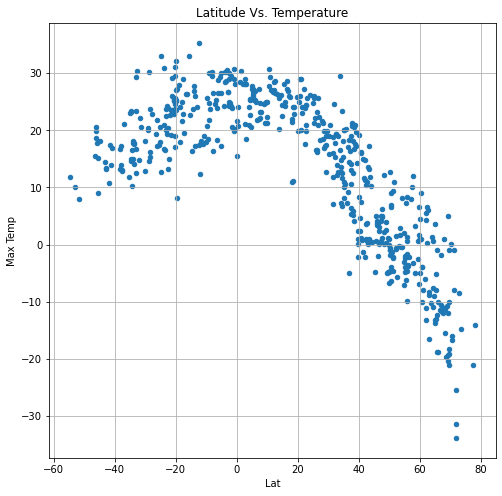

In [14]:
weather_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="Latitude Vs. Temperature")

plt.savefig('Output_Data\lat_vs_temp.png')
plt.show()

## Latitude vs. Humidity Plot

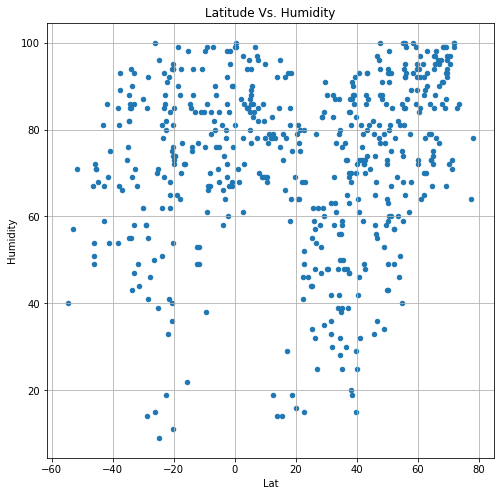

In [15]:
weather_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude Vs. Humidity")

plt.savefig('Output_Data\lat_vs_humidty.png')
plt.show()

## Latitude vs. Cloudiness Plot

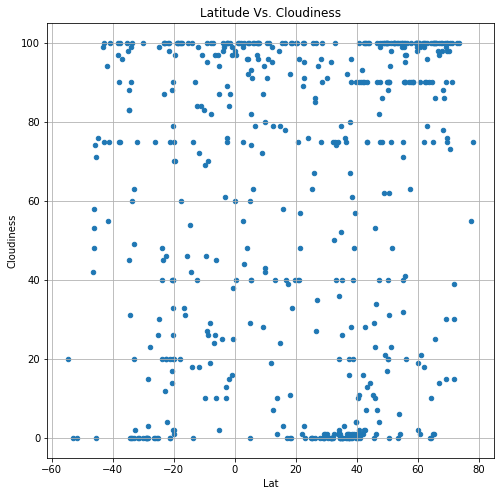

In [16]:
weather_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude Vs. Cloudiness")

plt.savefig('Output_Data\lat_vs_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

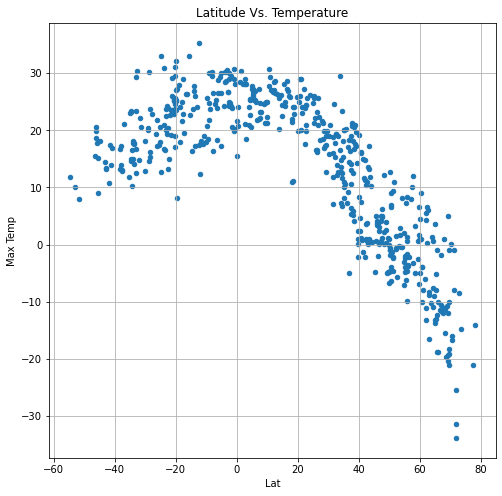

In [17]:
weather_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="Latitude Vs. Temperature")

plt.savefig('Output_Data\lat_vs_temp.png')
plt.show()

## Linear Regression

In [18]:
#Creating Data Frames for Northern Hemisphere and Southen Hemisphere

Northern_Hemisphere = weather_data.loc[weather_data["Lat"]>0]
Southern_Hemisphere = weather_data.loc[weather_data["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

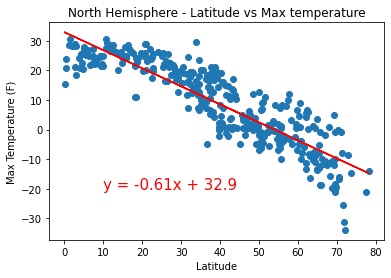

In [23]:
# Add the linear regression equation and line to plot
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('North Hemisphere - Latitude vs Max temperature')
plt.savefig('Output_Data/n_h_lat_temp.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

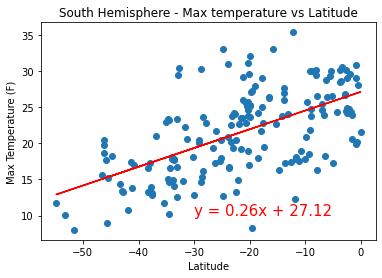

In [22]:
# Add the linear regression equation and line to plot
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('South Hemisphere - Max temperature vs Latitude')
plt.savefig('Output_Data/s_h_lat_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

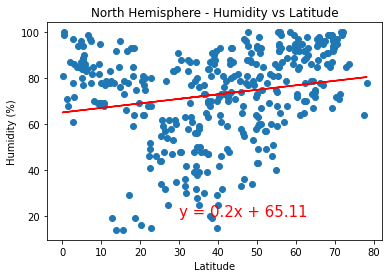

In [21]:
# Add the linear regression equation and line to plot
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('North Hemisphere - Humidity vs Latitude')
plt.savefig('Output_Data/n_h_lat_hum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

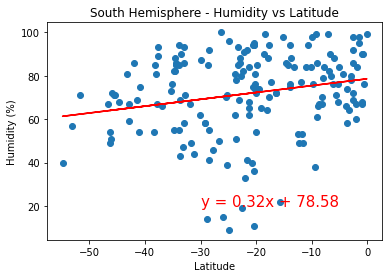

In [29]:
# Add the linear regression equation and line to plot
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('South Hemisphere - Humidity vs Latitude')
plt.savefig('Output_Data/s_h_lat_hum.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

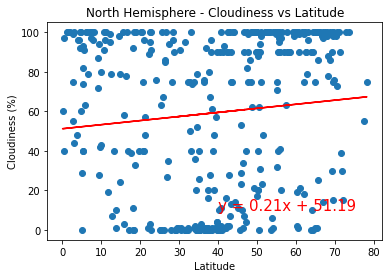

In [25]:
# Add the linear regression equation and line to plot
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('North Hemisphere - Cloudiness vs Latitude')
plt.savefig('Output_Data/n_h_lat_cloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

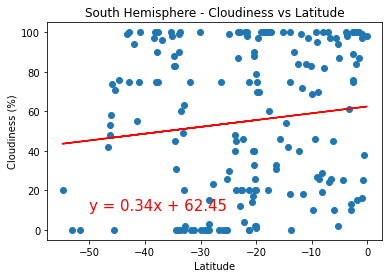

In [26]:
# Add the linear regression equation and line to plot
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('South Hemisphere - Cloudiness vs Latitude')
plt.savefig('Output_Data/s_h_lat_cloud.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

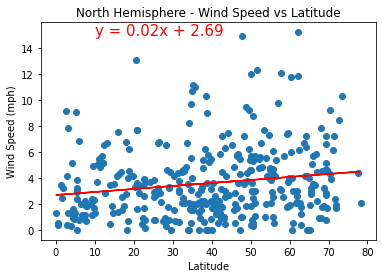

In [27]:
# Add the linear regression equation and line to plot
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('North Hemisphere - Wind Speed vs Latitude')
plt.savefig('Output_Data/n_h_lat_wspeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

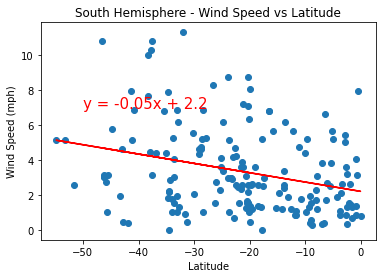

In [28]:
# Add the linear regression equation and line to plot
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('South Hemisphere - Wind Speed vs Latitude')
plt.savefig('Output_Data/s_h_lat_wspeed.png')
plt.show()

# Written Data Analysis

- Observation1 = Cities approaching to the equator records higher temperature in both hemispheres.
- Obeservation2 = In the Northern Hemisphere, the humidity in cities decreases approaching the equator which is the opposite in the Southern Hemisphere.
- Obeservation3 = In the Northern Hemisphere, the Wind Speed in cities decreases approaching the equator which is the opposite in the Southern Hemisphere.

Limitations: Uneven city numbers as cities are randomly generated

- Northern Hemisphere Cities = 363
- Southern Hemisphere Cities = 173

